# Data Preprocessing and Feature Engineering

In [4]:
import pandas as pd

In [3]:

df = pd.read_csv('claims_3.csv')


# Save updated data if needed
df.head()



,ClaimID,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,PartTimeFullTime,DaysWorkedPerWeek,DateOfAccident,ClaimDescription,ReportedDay,InitialCaseEstimate,Incurred,DetailedClaimDescription,InputText
0,1,15,11,28,500.00,M,S,44.0,0,0,F,5,5/10/2005,STRUCK SCAFFOLDING STRAIN LOWER BACK,3Thurs,9500,151.254501,I suffered a lower back injury when a scaffold...,"It happened on 5/10/2005. At present, I am 28 ..."
1,2,22,5,29,500.00,M,S,38.0,0,0,F,5,28/10/2003,STRUCK KNIFE LACERATED LEFT THUMB,2Wed,11500,442.125024,I suffered a laceration on my left thumb when ...,The accident occurred on 28/10/2003. I suffere...
2,3,22,7,28,197.37,M,M,16.0,0,0,P,3,25/05/2004,SLIPPED AND HIT STRAINED LEFT SHOULDER INJURY ...,2Wed,8000,1494.490505,"I slipped and hit my left shoulder, resulting ...",My weekly earnings total 197. I officially rep...
3,4,15,12,40,0.00,M,M,0.0,1,0,F,5,21/07/1994,HIT FALLING DOOR LACERATION LEFT SHOULDER INJU...,4Fri,500,138.900000,I sustained an injury when the door unexpected...,I sustained an injury when the door unexpected...
4,5,38,12,22,435.70,M,M,38.0,0,0,F,5,9/06/1992,STRUCK FALLING OBJECT LACERATION RIGHT RING FI...,4Fri,320,296.160000,I filed a claim for an injury sustained when I...,I filed a claim for an injury sustained when I...


In [5]:
df.shape


(21689, 19)

In [6]:
df.describe()


,ClaimID,ReportingDelay,AccidentHour,Age,WeeklyRate,HoursWorkedPerWeek,DependentChildren,DependentsOther,DaysWorkedPerWeek,InitialCaseEstimate,Incurred
count,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,21689.000000,2.168900e+04
mean,10846.011665,41.993361,11.504403,34.003504,373.259518,33.792077,0.112730,0.008668,4.908986,6721.876758,9.648797e+03
std,6262.085278,96.173544,3.741644,12.180846,272.696579,18.097896,0.505201,0.101712,0.534685,15015.545092,4.713260e+04
min,1.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.220000e-15
25%,5423.000000,14.000000,9.000000,24.000000,200.000000,38.000000,0.000000,0.000000,5.000000,500.000000,1.802500e+02
50%,10847.000000,22.000000,11.000000,32.000000,364.600000,38.000000,0.000000,0.000000,5.000000,1500.000000,4.959266e+02
75%,16269.000000,42.000000,14.000000,43.000000,500.000000,40.000000,0.000000,0.000000,5.000000,7500.000000,1.827600e+03
max,21691.000000,5360.000000,24.000000,79.000000,5811.300000,700.000000,6.000000,4.000000,7.000000,500000.000000,1.563323e+06


In [7]:
# Check for exact duplicate claim descriptions
duplicate_descriptions = df[df['ClaimDescription'].duplicated(keep=False)]

# View duplicates grouped together
duplicate_groups = duplicate_descriptions.sort_values('ClaimDescription')

# Print count
print(f"Total duplicate claim descriptions: {duplicate_descriptions.shape[0]}")
# Find duplicates based on 'ClaimDescription' and 'Incurred'
duplicates = df[df.duplicated(subset=['ClaimDescription', 'Incurred'], keep=False)]

# Sort and view the duplicates
duplicates = duplicates.sort_values(by=['ClaimDescription', 'Incurred'])

# Print how many such duplicates exist
print(f"Total duplicates based on ClaimDescription and Incurred: {duplicates.shape[0]}")
# Drop duplicates based on just those two columns
df = df.drop_duplicates(subset=['ClaimDescription', 'Incurred'])




Total duplicate claim descriptions: 12410
Total duplicates based on ClaimDescription and Incurred: 10


In [8]:
# Find all duplicate rows (every column matches)
duplicate_rows = df[df.duplicated(keep=False)]

# View them sorted for easier inspection
duplicate_rows = duplicate_rows.sort_values(by=list(df.columns))

# Print total count of duplicates
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")


Total duplicate rows: 0


In [9]:
df.isnull().sum()

ClaimID                      0
ReportingDelay               0
AccidentHour                 0
Age                          0
WeeklyRate                   0
Gender                       0
MaritalStatus               22
HoursWorkedPerWeek           0
DependentChildren            0
DependentsOther              0
PartTimeFullTime             0
DaysWorkedPerWeek            0
DateOfAccident               0
ClaimDescription             0
ReportedDay                  0
InitialCaseEstimate          0
Incurred                     0
DetailedClaimDescription     0
InputText                    0
dtype: int64

Incurred               1.000000
InitialCaseEstimate    0.419226
WeeklyRate             0.134489
Age                    0.089215
HoursWorkedPerWeek     0.044742
DependentsOther        0.025558
DependentChildren      0.015964
ReportingDelay         0.004111
ClaimID               -0.009510
DaysWorkedPerWeek     -0.012999
AccidentHour          -0.019066
Name: Incurred, dtype: float64


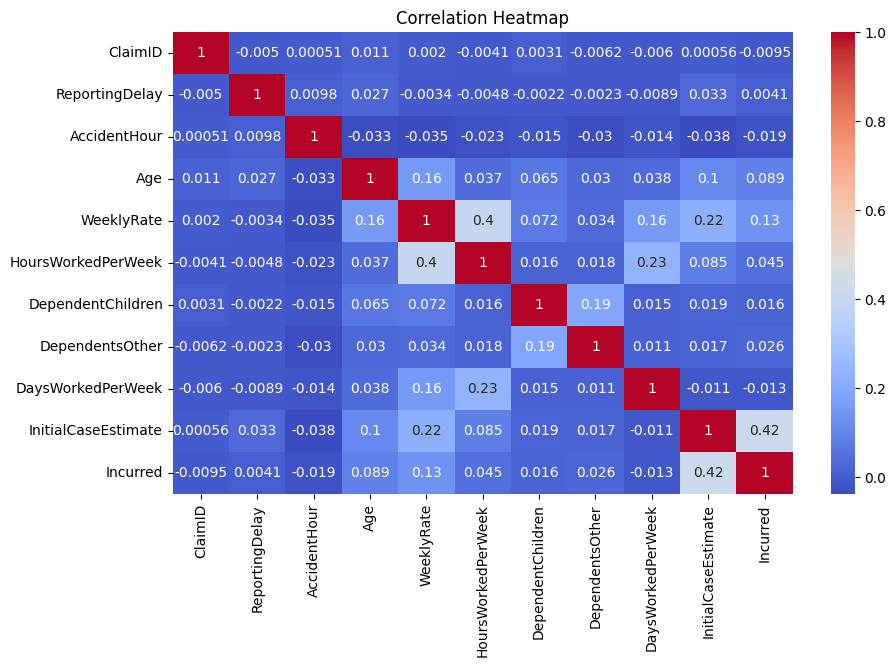

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Correlation with 'Incurred'
corr_with_incurred = corr_matrix['Incurred'].sort_values(ascending=False)
print(corr_with_incurred)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Top keywords in high-cost claims
high_cost_claims = df[df['Incurred'] > df['Incurred'].quantile(0.75)]
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=20)
X = vec.fit_transform(high_cost_claims['DetailedClaimDescription'])

word_freq = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()).sum().sort_values(ascending=False)
print(word_freq)


strain         2040
lower          2034
injury         1734
right          1674
sustained      1604
lifting        1489
slipped        1469
left           1345
heavy           959
shoulder        945
suffered        802
resulting       722
experienced     714
injured         608
fell            590
work            556
pain            552
knee            534
laceration      459
floor           446
dtype: int64


In [13]:
df['EstimateRatio'] = df['Incurred'] / (df['InitialCaseEstimate'] + 1)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'MiddleAge', 'Senior'])
def time_bucket(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['AccidentTimeBucket'] = df['AccidentHour'].apply(time_bucket)

# 5. Work Intensity Score
df['WorkIntensity'] = df['HoursWorkedPerWeek'] * df['DaysWorkedPerWeek']

# 6. Total Dependents
df['TotalDependents'] = df['DependentChildren'] + df['DependentsOther']

In [14]:
df

,ClaimID,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,...,ReportedDay,InitialCaseEstimate,Incurred,DetailedClaimDescription,InputText,EstimateRatio,AgeGroup,AccidentTimeBucket,WorkIntensity,TotalDependents
0,1,15,11,28,500.00,M,S,44.0,0,0,...,3Thurs,9500,151.254501,I suffered a lower back injury when a scaffold...,"It happened on 5/10/2005. At present, I am 28 ...",0.015920,Young,Morning,220.0,0
1,2,22,5,29,500.00,M,S,38.0,0,0,...,2Wed,11500,442.125024,I suffered a laceration on my left thumb when ...,The accident occurred on 28/10/2003. I suffere...,0.038442,Young,Night,190.0,0
2,3,22,7,28,197.37,M,M,16.0,0,0,...,2Wed,8000,1494.490505,"I slipped and hit my left shoulder, resulting ...",My weekly earnings total 197. I officially rep...,0.186788,Young,Morning,48.0,0
3,4,15,12,40,0.00,M,M,0.0,1,0,...,4Fri,500,138.900000,I sustained an injury when the door unexpected...,I sustained an injury when the door unexpected...,0.277246,MiddleAge,Afternoon,0.0,1
4,5,38,12,22,435.70,M,M,38.0,0,0,...,4Fri,320,296.160000,I filed a claim for an injury sustained when I...,I filed a claim for an injury sustained when I...,0.922617,Young,Afternoon,190.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,21687,23,9,53,200.00,M,M,38.0,0,0,...,1Tues,2650,582.166718,I was injured when a knife was accidentally st...,I was injured when a knife was accidentally st...,0.219603,Senior,Morning,190.0,0
21685,21688,15,13,23,500.00,M,S,40.0,0,0,...,3Thurs,1000,908.635098,I suffered a fracture in my right middle finge...,I suffered a fracture in my right middle finge...,0.907727,Young,Afternoon,200.0,0
21686,21689,109,12,19,200.00,M,S,38.0,0,0,...,2Wed,814,60.250000,I suffered an injury when my finger was caught...,I suffered an injury when my finger was caught...,0.073926,Young,Afternoon,190.0,0
21687,21690,7,9,34,553.13,M,S,38.0,0,0,...,3Thurs,1500,761.625000,"I was struck by a moving steel object, resulti...","Each week, I get paid 553. I live my life as a...",0.507412,MiddleAge,Morning,190.0,0


In [15]:
min_incurred = df['Incurred'].min()
max_incurred = df['Incurred'].max()

print(f"Minimum Incurred: {min_incurred}")
print(f"Maximum Incurred: {max_incurred}")


Minimum Incurred: 2.22e-15
Maximum Incurred: 1563322.696


In [16]:
min_incurred = df['EstimateRatio'].min()
max_incurred = df['EstimateRatio'].max()

print(f"Minimum EstimateRatio: {min_incurred}")
print(f"Maximum EstimateRatio: {max_incurred}")

Minimum EstimateRatio: 1.2682090831191089e-18
Maximum EstimateRatio: 60460.42425


In [17]:
# Pearson correlation (linear)
pearson_corr = df['WeeklyRate'].corr(df['Incurred'], method='pearson')

# Spearman correlation (monotonic, less sensitive to outliers)
spearman_corr = df['WeeklyRate'].corr(df['Incurred'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


Pearson correlation: 0.1345
Spearman correlation: 0.3512


In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate Pearson correlation with 'Incurred'
correlation_with_incurred = numeric_df.corr()['Incurred'].drop('Incurred')

# Sort by absolute correlation strength
correlation_sorted = correlation_with_incurred.abs().sort_values(ascending=False)

# Show results with sign
print(correlation_with_incurred.loc[correlation_sorted.index])


InitialCaseEstimate    0.419226
WeeklyRate             0.134489
Age                    0.089215
HoursWorkedPerWeek     0.044742
WorkIntensity          0.041923
DependentsOther        0.025558
EstimateRatio          0.025370
TotalDependents        0.019963
AccidentHour          -0.019066
DependentChildren      0.015964
DaysWorkedPerWeek     -0.012999
ClaimID               -0.009510
ReportingDelay         0.004111
Name: Incurred, dtype: float64


In [19]:
df.head(2)

,ClaimID,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,...,ReportedDay,InitialCaseEstimate,Incurred,DetailedClaimDescription,InputText,EstimateRatio,AgeGroup,AccidentTimeBucket,WorkIntensity,TotalDependents
0,1,15,11,28,500.0,M,S,44.0,0,0,...,3Thurs,9500,151.254501,I suffered a lower back injury when a scaffold...,"It happened on 5/10/2005. At present, I am 28 ...",0.015920,Young,Morning,220.0,0
1,2,22,5,29,500.0,M,S,38.0,0,0,...,2Wed,11500,442.125024,I suffered a laceration on my left thumb when ...,The accident occurred on 28/10/2003. I suffere...,0.038442,Young,Night,190.0,0


In [20]:
from scipy.stats import f_oneway

# Define categorical columns
categorical_cols = ['Gender', 'MaritalStatus', 'PartTimeFullTime','ClaimDescription','AgeGroup']  # Add others if needed

# Run ANOVA for each categorical feature
for col in categorical_cols:
    groups = [df[df[col] == level]['Incurred'].dropna() for level in df[col].dropna().unique()]
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"{col}: F = {f_stat:.4f}, p = {p_value:.4e}")
    else:
        print(f"{col}: skipped (only one group present)")


Gender: F = 10.4253, p = 1.2449e-03
MaritalStatus: F = 14.8961, p = 3.4287e-07
PartTimeFullTime: F = 20.9042, p = 4.8551e-06
ClaimDescription: F = 1.1019, p = 3.2307e-07
AgeGroup: F = 91.8135, p = 1.9670e-40


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Fill missing descriptions
df['InputText'] = df['InputText'].fillna('')

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['InputText'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 2: Compute correlation of each word with Incurred
word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

# Step 3: Sort by correlation strength
word_corr_series = pd.Series(word_correlations).sort_values()

# Top words negatively and positively correlated with Incurred
print("🔻 Words associated with **LOW** Incurred:")
print(word_corr_series.head(10))

print("\n🔺 Words associated with **HIGH** Incurred:")
print(word_corr_series.tail(10))


🔻 Words associated with **LOW** Incurred:
knife          -0.236375
laceration     -0.212401
eye            -0.206280
finger         -0.192454
struck         -0.180145
left           -0.163140
accidentally   -0.158306
specified      -0.153022
cut            -0.152105
foreign        -0.142918
dtype: float64

🔺 Words associated with **HIGH** Incurred:
boxes          0.074017
result         0.074937
neck           0.086093
pain           0.111371
shoulder       0.123513
experienced    0.163483
heavy          0.163568
lifting        0.200101
strain         0.260178
lower          0.285383
dtype: float64


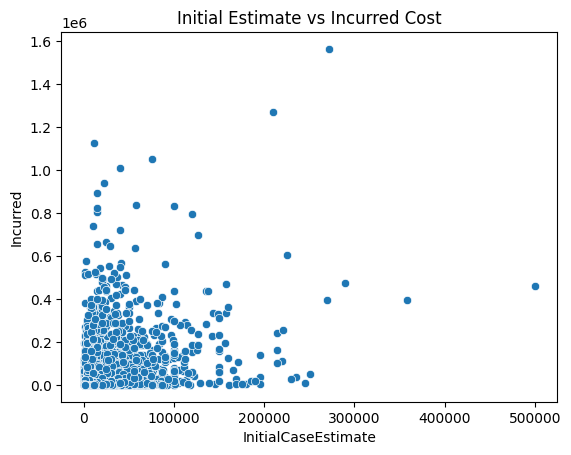

Pearson correlation: 0.4192


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='InitialCaseEstimate', y='Incurred', data=df)
plt.title('Initial Estimate vs Incurred Cost')
plt.show()

# Pearson correlation
corr = df['InitialCaseEstimate'].corr(df['Incurred'])
print(f"Pearson correlation: {corr:.4f}")


In [23]:
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']
df['EstimateAccuracy'] = df['EstimateGap'].apply(
    lambda x: 'Underestimated' if x > 0 else ('Overestimated' if x < 0 else 'Accurate')
)

# Summary
print(df['EstimateAccuracy'].value_counts())


EstimateAccuracy
Overestimated     17210
Underestimated     4470
Accurate              4
Name: count, dtype: int64


In [24]:
df['Severity'] = pd.qcut(df['Incurred'], q=3, labels=['Low', 'Medium', 'High'])

# Group by severity
severity_gap = df.groupby('Severity')['EstimateGap'].agg(['mean', 'median', 'std'])
print(severity_gap)


                  mean      median           std
Severity                                        
Low       -1605.429559 -437.420907   3813.665009
Medium    -3311.391212 -765.834322   6395.122048
High      13699.817895 -724.535000  73016.730466


C:\Users\aimte\AppData\Local\Temp\ipykernel_20504\3615441774.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_gap = df.groupby('Severity')['EstimateGap'].agg(['mean', 'median', 'std'])


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import spearmanr
import pandas as pd

# Fill missing descriptions
df['InputText'] = df['InputText'].fillna('')

# Vectorize text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['InputText'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Compute correlation with Incurred
word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

# Sort by correlation
word_corr_series = pd.Series(word_correlations).sort_values()

# Get top N high and low correlation words
low_risk_words = set(word_corr_series.head(15).index)
high_risk_words = set(word_corr_series.tail(15).index)


In [26]:
# Add EstimateGap
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']

def contains_keywords(text, keywords):
    if not isinstance(text, str): return False
    text = text.lower()
    return any(word in text for word in keywords)

def classify_severity(row):
    incurred = row['Incurred']
    gap = row['EstimateGap']
    delay = row['ReportingDelay']
    text = row['InputText']

    # High severity
    if (
        incurred > df['Incurred'].quantile(0.75) or
        gap > 10000 or
        delay > 10 or
        contains_keywords(text, high_risk_words)
    ):
        return 'High'

    # Low severity
    elif (
        incurred < df['Incurred'].quantile(0.25) and
        gap >= -500 and
        contains_keywords(text, low_risk_words)
    ):
        return 'Low'

    # Medium otherwise
    return 'Medium'

df['SeverityLabel'] = df.apply(classify_severity, axis=1)


In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import spearmanr

# Step 0: Prepare required fields
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']
df['InputText'] = df['InputText'].fillna('')
df['ReportingDelay'] = df['ReportingDelay'].fillna(0)

# Step 1: Identify high-risk and low-risk keywords using TF-IDF correlation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['InputText'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

word_corr_series = pd.Series(word_correlations).sort_values()
low_risk_words = set(word_corr_series.head(20).index)
high_risk_words = set(word_corr_series.tail(20).index)

def match_keywords(text, keywords):
    text = text.lower()
    return any(word in text for word in keywords)

df['HasHighRiskWord'] = df['InputText'].apply(lambda x: match_keywords(x, high_risk_words))
df['HasLowRiskWord'] = df['InputText'].apply(lambda x: match_keywords(x, low_risk_words))

# Step 2: Quantile-based binning
df['IncurredQuantile'] = pd.qcut(df['Incurred'], q=3, labels=['LowCost', 'MediumCost', 'HighCost'])
df['DelayQuantile'] = pd.qcut(df['ReportingDelay'], q=3, labels=['ShortDelay', 'ModerateDelay', 'LongDelay'])
df['EstimateCategory'] = pd.cut(df['EstimateGap'], 
                                bins=[-np.inf, -1000, 1000, np.inf], 
                                labels=['Overestimated', 'Accurate', 'Underestimated'])

# Step 3: Rule matrix using group-based logic
def determine_severity(row):
    if (
        row['IncurredQuantile'] == 'HighCost' #or
        # row['EstimateCategory'] == 'Underestimated' or
        # row['DelayQuantile'] == 'LongDelay' or
        # row['HasHighRiskWord']
    ):
        return 'High'
    elif (
         row['IncurredQuantile'] == 'LowCost' #and
        # row['EstimateCategory'] != 'Underestimated' or
        # row['HasLowRiskWord']
    ):
        return 'Low'
    elif(
        row['IncurredQuantile'] == 'MediumCost' #or
        # row['EstimateCategory'] == 'Accurate'         
    ):
        return 'Medium'

df['SeverityLabel'] = df.apply(determine_severity, axis=1)


In [28]:
# Count the number of claims in each severity category
severity_counts = df['SeverityLabel'].value_counts()
print(severity_counts)


SeverityLabel
Low       7228
Medium    7228
High      7228
Name: count, dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 21688
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClaimID                   21684 non-null  int64   
 1   ReportingDelay            21684 non-null  int64   
 2   AccidentHour              21684 non-null  int64   
 3   Age                       21684 non-null  int64   
 4   WeeklyRate                21684 non-null  float64 
 5   Gender                    21684 non-null  object  
 6   MaritalStatus             21662 non-null  object  
 7   HoursWorkedPerWeek        21684 non-null  float64 
 8   DependentChildren         21684 non-null  int64   
 9   DependentsOther           21684 non-null  int64   
 10  PartTimeFullTime          21684 non-null  object  
 11  DaysWorkedPerWeek         21684 non-null  int64   
 12  DateOfAccident            21684 non-null  object  
 13  ClaimDescription          21684 non-null  object  


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 21688
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ClaimID                   21684 non-null  int64   
 1   ReportingDelay            21684 non-null  int64   
 2   AccidentHour              21684 non-null  int64   
 3   Age                       21684 non-null  int64   
 4   WeeklyRate                21684 non-null  float64 
 5   Gender                    21684 non-null  object  
 6   MaritalStatus             21662 non-null  object  
 7   HoursWorkedPerWeek        21684 non-null  float64 
 8   DependentChildren         21684 non-null  int64   
 9   DependentsOther           21684 non-null  int64   
 10  PartTimeFullTime          21684 non-null  object  
 11  DaysWorkedPerWeek         21684 non-null  int64   
 12  DateOfAccident            21684 non-null  object  
 13  ClaimDescription          21684 non-null  object  


In [30]:
df.to_csv("claims_4.csv", index=False)
